In [2]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

Set some constants

In [3]:
p_xt = [0.05, 0.08, 0.15, 0.25]

pde = [0.372, 0.4715, 0.5341, 0.5468]
pde_main = 47.15/100.

path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_"

In [4]:
def find_files(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    files = []
    for i_file in onlyfiles:
        if i_file[0] != '.':
            files.append(i_file)
            
    return files

In [5]:
fs = find_files('/home/andrii/work/sim_telarray/charge_resolution/pxt_0.05/nsb/')

In [6]:
fs

['out_file_pxt_0.05_ff-1m_r_5nphot_600000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_14000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_100000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_10000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_6000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_50000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_20000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_2000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_5nphot_400000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_200000000_dist_500_radius_150_.txt']

In [7]:
mypath = path + str(p_xt[0]) + '/nsb/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [8]:
onlyfiles

['out_file_pxt_0.05_ff-1m_r_5nphot_600000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_14000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_100000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_10000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_6000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_50000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_20000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_2000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_5nphot_400000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_200000000_dist_500_radius_150_.txt']

In [9]:
files = []
for i_file in onlyfiles:
    if i_file[0] != '.':
        files.append(i_file)

In [10]:
files

['out_file_pxt_0.05_ff-1m_r_5nphot_600000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_14000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_3nphot_100000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_10000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_6000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_50000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_2nphot_20000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_1nphot_2000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_5nphot_400000000_dist_500_radius_150_.txt',
 'out_file_pxt_0.05_ff-1m_r_4nphot_200000000_dist_500_radius_150_.txt']

In [11]:
def read_data(filename):
   
    pixel = []
    n_pe = []
    q_res = []

    with open(filename, "r") as file:
        lines = file.readlines()[1:]
        for line in lines:
            words = line.split()
            #print(words[0], ' ; ', words[1], ' ; ', words[2])    
            pixel.append(float(words[0]))
            n_pe.append(float(words[1]))
            q_res.append(float(words[2]))
                
    return pixel, n_pe, q_res

In [12]:
def swap_elements(a, b):
    tmp = a
    a = b
    b = tmp
    return a, b

In [13]:
def my_sort(a, b, a_err, b_err):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])
                a_err[i], a_err[j] = swap_elements(a_err[i], a_err[j])
                b_err[i], b_err[j] = swap_elements(b_err[i], b_err[j])
                

In [14]:
def my_sort_2(a, b):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])

In [133]:
from random import randrange
randrange(7986)

pixel = randrange(7986)
pixel

7090

In [54]:
pe_mean = []
pe_std = []
charge_resolution = []
charge_resolution_std = []

pe_pixel = []
charge_resolution_pixel = []

#path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_"

for item, i_xt in enumerate(p_xt):
    
    print(item, " ", i_xt)
    
    i_path = path + str(i_xt)
    found_files = find_files(i_path)

    pe_mean_tmp = []
    pe_mean_std_tmp = []
    charge_resolution_tmp = []
    charge_resolution_std_tmp = []
    pe_pixel_tmp = []
    charge_pixel_tmp = []
    
    for i, i_file in enumerate(found_files):
        
        pixels_tmp, n_pe_tmp, q_res_tmp = read_data(i_path + '/' + i_file)
        
        pe_mean_tmp.append(np.mean(n_pe_tmp))
        pe_mean_std_tmp.append(np.std(n_pe_tmp))
        
        charge_resolution_tmp.append(np.mean(q_res_tmp))
        charge_resolution_std_tmp.append(np.std(q_res_tmp))
        
        pe_pixel_tmp.append(n_pe_tmp[pixel])
        charge_pixel_tmp.append(q_res_tmp[pixel])
        
    pe_mean.append(pe_mean_tmp)
    pe_std.append(pe_mean_std_tmp)
    
    charge_resolution.append(charge_resolution_tmp)
    charge_resolution_std.append(charge_resolution_std_tmp)
    
    pe_pixel.append(pe_pixel_tmp)
    charge_resolution_pixel.append(charge_pixel_tmp)
    


0   0.05
1   0.08
2   0.15
3   0.25


In [56]:
pe_pixel[0]

[323.305,
 7.83,
 53.135,
 5.2298,
 3.1836,
 26.332,
 10.297,
 1.0116,
 203.119,
 104.047]

In [21]:
gammas_mean[0]

[2.1611148338743993,
 6.4858357184613755,
 10.805409001716868,
 15.126798173224492,
 21.61317336854786,
 54.03618818012993,
 108.0604046262345,
 216.2744672181372,
 432.3098648771911,
 648.3621566381531]

In [58]:
my_sort(pe_mean[0], charge_resolution[0], pe_std[0], charge_resolution_std[0])
my_sort(pe_mean[1], charge_resolution[1], pe_std[1], charge_resolution_std[1])
my_sort(pe_mean[2], charge_resolution[2], pe_std[2], charge_resolution_std[2])
my_sort(pe_mean[3], charge_resolution[3], pe_std[3], charge_resolution_std[3])

In [23]:
gammas_mean = []
gammas_mean_std = []

for i_pe in range(len(pe_mean)):
    gammas_mean.append([element/pde_main for element in pe_mean[i_pe]])
    gammas_mean_std.append([element/pde_main for element in pe_std[i_pe]])

In [24]:
gammas_mean[0]

[2.1611148338743993,
 6.4858357184613755,
 10.805409001716868,
 15.126798173224492,
 21.61317336854786,
 54.03618818012993,
 108.0604046262345,
 216.2744672181372,
 432.3098648771911,
 648.3621566381531]

In [25]:
p_xt = [0.05, 0.08, 0.15, 0.25]

In [17]:
p_xt = [0.15]

In [61]:
pe_mean_nsb = []
pe_std_nsb = []
charge_resolution_nsb = []
charge_resolution_std_nsb = []
pe_nsb_pixel = []
charge_resolution_nsb_pixel = []

#path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_"

for item, i_xt in enumerate(p_xt):
    
    print(item, " ", i_xt)
    
    i_path = path + str(i_xt) + '/nsb/'
    found_files = find_files(i_path)

    pe_mean_tmp = []
    pe_mean_std_tmp = []
    charge_resolution_tmp = []
    charge_resolution_std_tmp = []
    pe_pixel_tmp = []
    charge_pixel_tmp = []
    
    for i_file in found_files:
        
        pixels_tmp, n_pe_tmp, q_res_tmp = read_data(i_path + '/' + i_file)
        
        pe_mean_tmp.append(np.mean(n_pe_tmp))
        pe_mean_std_tmp.append(np.std(n_pe_tmp))
        
        charge_resolution_tmp.append(np.mean(q_res_tmp))
        charge_resolution_std_tmp.append(np.std(q_res_tmp))
        
        pe_pixel_tmp.append(n_pe_tmp[pixel])
        charge_pixel_tmp.append(q_res_tmp[pixel])
        
    pe_mean_nsb.append(pe_mean_tmp)
    pe_std_nsb.append(pe_mean_std_tmp)
    charge_resolution_nsb.append(charge_resolution_tmp)
    charge_resolution_std_nsb.append(charge_resolution_std_tmp)
    
    pe_nsb_pixel.append(pe_pixel_tmp)
    charge_resolution_nsb_pixel.append(charge_pixel_tmp)
    


0   0.05
1   0.08
2   0.15
3   0.25


In [62]:
my_sort(pe_mean_nsb[0], charge_resolution_nsb[0], pe_std_nsb[0], charge_resolution_std_nsb[0])
my_sort(pe_mean_nsb[1], charge_resolution_nsb[1], pe_std_nsb[1], charge_resolution_std_nsb[1])
my_sort(pe_mean_nsb[2], charge_resolution_nsb[2], pe_std_nsb[2], charge_resolution_std_nsb[2])
my_sort(pe_mean_nsb[3], charge_resolution_nsb[3], pe_std_nsb[3], charge_resolution_std_nsb[3])

In [28]:
gammas_mean_nsb = []
gammas_mean_std_nsb = []

for i_pe in range(len(pe_mean_nsb)):
    gammas_mean_nsb.append([element/pde_main for element in pe_mean_nsb[i_pe]])
    gammas_mean_std_nsb.append([element/pde_main for element in pe_std_nsb[i_pe]])

In [134]:
p_xt = [0.05, 0.08, 0.15, 0.25]
path_pde = ['PDE_38', '', 'PDE_53', 'PDE_54']

pe_mean_nsb_pde = []
pe_std_nsb_pde = []
charge_resolution_nsb_pde = []
charge_resolution_std_nsb_pde = []
pe_nsb_pde_pixel = []
charge_resolution_nsb_pde_pixel = []

#path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_"

for item, i_xt in enumerate(p_xt):
    
    print(item, " ", i_xt)
    
    i_path = path + str(i_xt) + '/nsb/' + path_pde[item]
    found_files = find_files(i_path)

    pe_mean_tmp = []
    pe_mean_std_tmp = []
    charge_resolution_tmp = []
    charge_resolution_std_tmp = []
    pe_pixel_tmp = []
    charge_pixel_tmp = []
    
    for i_file in found_files:
        
        pixels_tmp, n_pe_tmp, q_res_tmp = read_data(i_path + '/' + i_file)
        
        pe_pixel_tmp.append(n_pe_tmp[pixel])
        charge_pixel_tmp.append(q_res_tmp[pixel])
        
        pe_mean_tmp.append(np.mean(n_pe_tmp))
        pe_mean_std_tmp.append(np.std(n_pe_tmp))
        
        charge_resolution_tmp.append(np.mean(q_res_tmp))
        charge_resolution_std_tmp.append(np.std(q_res_tmp))
        
    pe_mean_nsb_pde.append(pe_mean_tmp)
    pe_std_nsb_pde.append(pe_mean_std_tmp)
    charge_resolution_nsb_pde.append(charge_resolution_tmp)
    charge_resolution_std_nsb_pde.append(charge_resolution_std_tmp)
    
    pe_nsb_pde_pixel.append(pe_pixel_tmp)
    charge_resolution_nsb_pde_pixel.append(charge_pixel_tmp)


0   0.05
1   0.08
2   0.15
3   0.25


In [105]:
print(len(pe_nsb_pde_pixel[0]))
print(len(pe_nsb_pde_pixel[1]))
print(len(pe_nsb_pde_pixel[2]))
print(len(pe_nsb_pde_pixel[3]))

10
10
9
9


In [135]:
my_sort_2(pe_nsb_pde_pixel[0], charge_resolution_nsb_pde_pixel[0])
my_sort_2(pe_nsb_pde_pixel[1], charge_resolution_nsb_pde_pixel[1])
my_sort_2(pe_nsb_pde_pixel[2], charge_resolution_nsb_pde_pixel[2])
my_sort_2(pe_nsb_pde_pixel[3], charge_resolution_nsb_pde_pixel[3])

In [136]:
gamma_nsb_pde_pixel = []

for i_pe in range(len(pe_mean_nsb)):
    gamma_nsb_pde_pixel.append([element/pde[i_pe] for element in pe_nsb_pde_pixel[i_pe]])

In [137]:
my_sort(pe_mean_nsb_pde[0], charge_resolution_nsb_pde[0], pe_std_nsb_pde[0], charge_resolution_std_nsb_pde[0])
my_sort(pe_mean_nsb_pde[1], charge_resolution_nsb_pde[1], pe_std_nsb_pde[1], charge_resolution_std_nsb_pde[1])
my_sort(pe_mean_nsb_pde[2], charge_resolution_nsb_pde[2], pe_std_nsb_pde[2], charge_resolution_std_nsb_pde[2])
my_sort(pe_mean_nsb_pde[3], charge_resolution_nsb_pde[3], pe_std_nsb_pde[3], charge_resolution_std_nsb_pde[3])

In [138]:
gammas_mean_nsb_pde = []
gammas_mean_nsb_pde_std = []

for i_pe in range(len(pe_mean_nsb)):
    gammas_mean_nsb_pde.append([element/pde[i_pe] for element in pe_mean_nsb_pde[i_pe]])
    gammas_mean_nsb_pde_std.append([element/pde[i_pe] for element in pe_std_nsb_pde[i_pe]])

In [32]:
charge_resolution_nsb[0]

[0.7349345662688399,
 0.562110958752641,
 0.45981244721877557,
 0.39426174412788906,
 0.33089306300471794,
 0.21354619195510016,
 0.1546277057638843,
 0.11023495027398035,
 0.08676086129995854,
 0.08633564402579455]

In [33]:
pe_std_nsb[2]

[0.048319750936119565,
 0.1198134469356531,
 0.1925333352738262,
 0.26484789946607407,
 0.37059647391042144,
 0.9153537142924637,
 1.7988742959397181,
 3.5888252534630016,
 7.265439600420382,
 10.76200953154213]

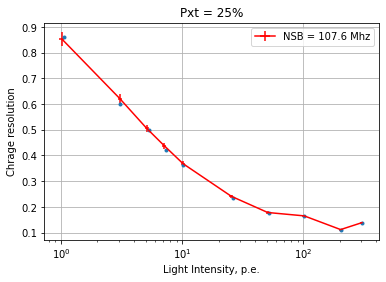

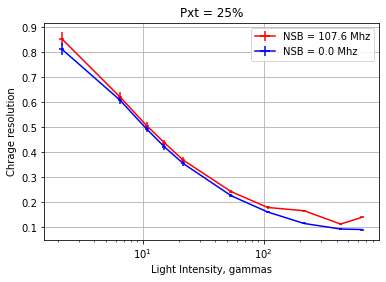

In [65]:
plt.errorbar(pe_mean_nsb[3], charge_resolution_nsb[3], yerr = charge_resolution_std_nsb[3], xerr = pe_std_nsb[3], color = 'red', label='NSB = 107.6 Mhz')
#plt.errorbar(pe_mean[3], charge_resolution[3], yerr = charge_resolution_std[3], xerr = pe_std[3], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 25%')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_25p_nsb.png', dpi=1800)

#plt.plot(pe_pixel[3], charge_resolution_pixel[3], '.')
plt.plot(pe_nsb_pixel[3], charge_resolution_nsb_pixel[3], '.')

plt.show()

plt.errorbar(gammas_mean_nsb[3], charge_resolution_nsb[3], yerr = charge_resolution_std_nsb[3], xerr = gammas_mean_std_nsb[3], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(gammas_mean[3], charge_resolution[3], yerr = charge_resolution_std[3], xerr = gammas_mean_std[3], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 25%')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_25p_nsb.png', dpi=1800)
plt.show()



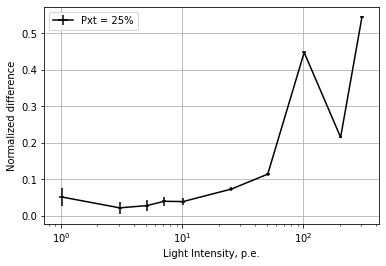

In [26]:
plt.errorbar(pe_mean_nsb[3], (np.array(charge_resolution_nsb[3]) - np.array(charge_resolution[3]))/np.array(charge_resolution[3]), yerr = charge_resolution_std_nsb[3], xerr = pe_std_nsb[3], color = 'black', label='Pxt = 25%')
#plt.errorbar(pe_mean_nsb[2], (np.array(charge_resolution_nsb[2]) - np.array(charge_resolution[2][-1:]))/np.array(charge_resolution[2][-1:]), yerr = charge_resolution_std_nsb[2], xerr = pe_std_nsb[2], color = 'red', label='NSB = 107.6 Mhz')
#plt.errorbar(pe_mean_nsb[0], (np.array(charge_resolution_nsb[0]) - np.array(charge_resolution[0]))/np.array(charge_resolution[0]), yerr = charge_resolution_std_nsb[0], xerr = pe_std_nsb[0], color = 'red', label='Pxt = 5%')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized difference')
plt.savefig('charge_resolution_25p_diff_nsb.png', dpi=1800)
plt.show()

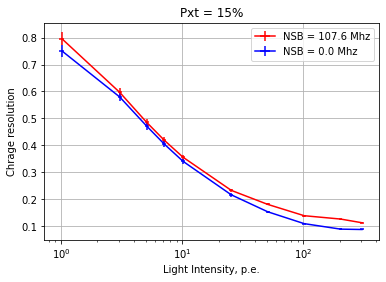

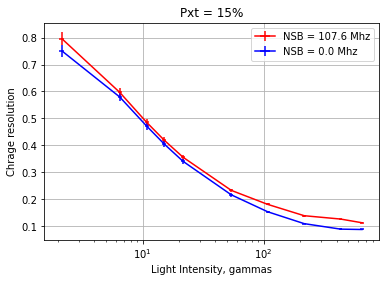

In [27]:
plt.errorbar(pe_mean_nsb[2], charge_resolution_nsb[2], yerr = charge_resolution_std_nsb[2], xerr = pe_std_nsb[2], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(pe_mean[2], charge_resolution[2], yerr = charge_resolution_std[2], xerr = pe_std[2], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 15%')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_15p_nsb.png', dpi=1800)
plt.show()

plt.errorbar(gammas_mean_nsb[2], charge_resolution_nsb[2], yerr = charge_resolution_std_nsb[2], xerr = gammas_mean_std_nsb[2], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(gammas_mean[2], charge_resolution[2], yerr = charge_resolution_std[2], xerr = gammas_mean_std[2], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 15%')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_25p_nsb.png', dpi=1800)
plt.show()

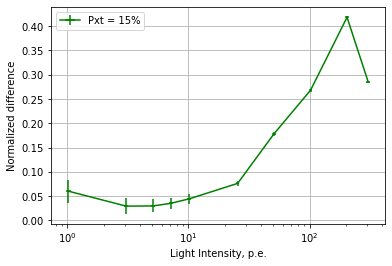

In [28]:
plt.errorbar(pe_mean_nsb[2], (np.array(charge_resolution_nsb[2]) - np.array(charge_resolution[2]))/np.array(charge_resolution[2]), yerr = charge_resolution_std_nsb[2], xerr = pe_std_nsb[0], color = 'green', label='Pxt = 15%')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized difference')
plt.savefig('charge_resolution_15p_diff_nsb.png', dpi=1800)
plt.show()

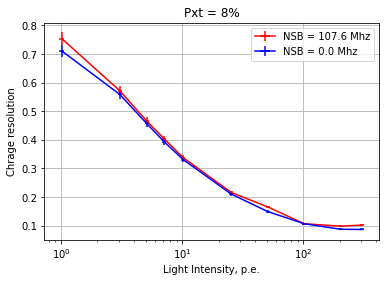

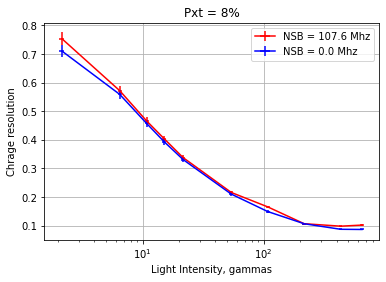

In [28]:
plt.errorbar(pe_mean_nsb[1], charge_resolution_nsb[1], yerr = charge_resolution_std_nsb[1], xerr = pe_std_nsb[1], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(pe_mean[1], charge_resolution[1], yerr = charge_resolution_std[1], xerr = pe_std[1], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 8%')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Chrage resolution')
plt.show()

plt.errorbar(gammas_mean_nsb[1], charge_resolution_nsb[1], yerr = charge_resolution_std_nsb[1], xerr = gammas_mean_std_nsb[1], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(gammas_mean[1], charge_resolution[1], yerr = charge_resolution_std[1], xerr = gammas_mean_std[1], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 8%')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_25p_nsb.png', dpi=1800)
plt.show()

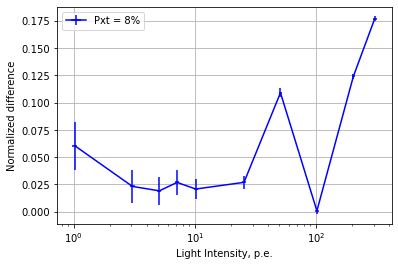

In [30]:
plt.errorbar(pe_mean_nsb[1], (np.array(charge_resolution_nsb[1]) - np.array(charge_resolution[1]))/np.array(charge_resolution[1]), yerr = charge_resolution_std_nsb[1], xerr = pe_std_nsb[1], color = 'blue', label='Pxt = 8%')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized difference')
plt.savefig('charge_resolution_8p_diff_nsb.png', dpi=1800)
plt.show()

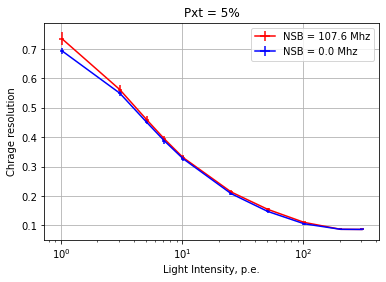

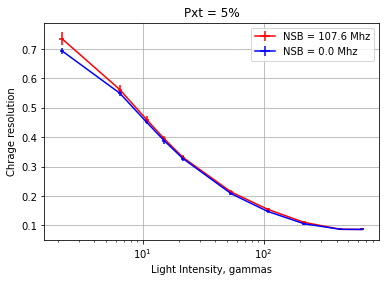

In [29]:
plt.errorbar(pe_mean_nsb[0], charge_resolution_nsb[0], yerr = charge_resolution_std_nsb[0], xerr = pe_std_nsb[0], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(pe_mean[0], charge_resolution[0], yerr = charge_resolution_std[0], xerr = pe_std[0], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 5%')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_5p_nsb.png', dpi=1800)
plt.show()

plt.errorbar(gammas_mean_nsb[0], charge_resolution_nsb[0], yerr = charge_resolution_std_nsb[0], xerr = gammas_mean_std_nsb[0], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(gammas_mean[0], charge_resolution[0], yerr = charge_resolution_std[0], xerr = gammas_mean_std[0], color = 'blue', label='NSB = 0.0 Mhz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('Pxt = 5%')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.savefig('charge_resolution_25p_nsb.png', dpi=1800)
plt.show()

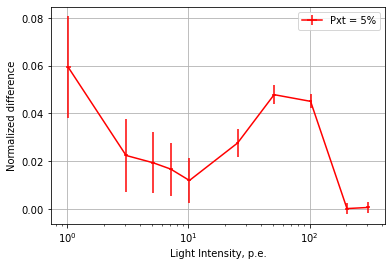

In [32]:
#plt.errorbar(pe_mean_nsb[3], (np.array(charge_resolution_nsb[3]) - np.array(charge_resolution[3]))/np.array(charge_resolution[3]), yerr = charge_resolution_std_nsb[3], xerr = pe_std_nsb[3], color = 'black', label='Pxt = 25%')
#plt.errorbar(pe_mean_nsb[2], (np.array(charge_resolution_nsb[2]) - np.array(charge_resolution[2][-1:]))/np.array(charge_resolution[2][-1:]), yerr = charge_resolution_std_nsb[2], xerr = pe_std_nsb[2], color = 'red', label='NSB = 107.6 Mhz')
plt.errorbar(pe_mean_nsb[0], (np.array(charge_resolution_nsb[0]) - np.array(charge_resolution[0]))/np.array(charge_resolution[0]), yerr = charge_resolution_std_nsb[0], xerr = pe_std_nsb[0], color = 'red', label='Pxt = 5%')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized difference')
plt.savefig('charge_resolution_5p_diff_nsb.png', dpi=1800)
plt.show()

In [60]:
pe_mean_nsb[0]

[1.0192937273068736,
 3.0571098034305746,
 5.097797796419181,
 7.137007387003882,
 10.189466382872167,
 25.472739451608867,
 50.97475059471641,
 101.95367021409791,
 203.7522358833104,
 305.63556116188806]

In [61]:
pe_mean[0]

[1.0189656441717792,
 3.0580715412545385,
 5.094750344309503,
 7.132285338675348,
 10.190611243270315,
 25.478062726931263,
 50.95048078126956,
 101.97341129335169,
 203.8341012895956,
 305.7027568548892]

In [62]:
print(len(charge_resolution[0]))
print(len(pe_mean[0]))

10
10


In [70]:
charge_resolution_poisson = []
charge_resolution_poisson_50pde = []
pe_poisson = np.arange(3, 300, 1)

for i in range(len(pe_poisson)):
    charge_resolution_poisson.append(1./math.sqrt(pe_poisson[i]))
    charge_resolution_poisson_50pde.append(1./math.sqrt(pe_poisson[i]/0.3))

In [71]:
charge_gold = []

for i in range(len(pe_mean[1])):
    #pe = 
    charge_gold.append(1./math.sqrt(np.array(pe_mean[1][i])))

In [82]:
charge_gold

[0.9907120884517524,
 0.5720576789952156,
 0.44313629680162936,
 0.37444536770393966,
 0.3131994984617528,
 0.19814370383946536,
 0.14011111159657405,
 0.0990791562968838,
 0.07004637091981869,
 0.05719324059032627]

In [27]:
diff_05 = np.absolute(np.array(charge_resolution[0]) - np.array(charge_resolution[1]))/np.array(charge_resolution[1])
diff_08 = np.absolute(np.array(charge_resolution[1]) - np.array(charge_resolution[1]))/np.array(charge_resolution[1])
diff_15 = np.absolute(np.array(charge_resolution[2]) - np.array(charge_resolution[1]))/np.array(charge_resolution[1])
diff_25 = np.absolute(np.array(charge_resolution[3]) - np.array(charge_resolution[1]))/np.array(charge_resolution[1])


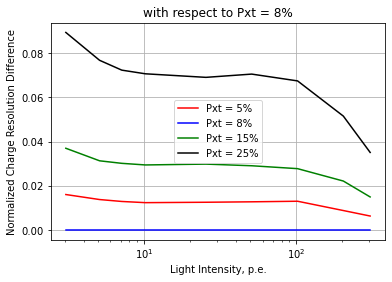

In [28]:
plt.plot(pe_mean[0][1:], diff_05[1:], color = 'red', label='Pxt = 5%')
plt.plot(pe_mean[1][1:], diff_08[1:], color = 'blue', label='Pxt = 8%')
plt.plot(pe_mean[2][1:], diff_15[1:], color = 'green', label='Pxt = 15%')
plt.plot(pe_mean[3][1:], diff_25[1:], color = 'black', label='Pxt = 25%')

#plt.yscale('log')
plt.title('with respect to Pxt = 8%')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized Charge Resolution Difference')
plt.grid(True)
plt.legend()
plt.savefig('norm_diff_pxt8.png', dpi=1800)
plt.show()

In [29]:
diff_05_poisson = np.absolute(np.array(charge_resolution[0]) - np.array(charge_gold))/np.array(charge_gold)
diff_08_poisson = np.absolute(np.array(charge_resolution[1]) - np.array(charge_gold))/np.array(charge_gold)
diff_15_poisson = np.absolute(np.array(charge_resolution[2]) - np.array(charge_gold))/np.array(charge_gold)
diff_25_poisson = np.absolute(np.array(charge_resolution[3]) - np.array(charge_gold))/np.array(charge_gold)


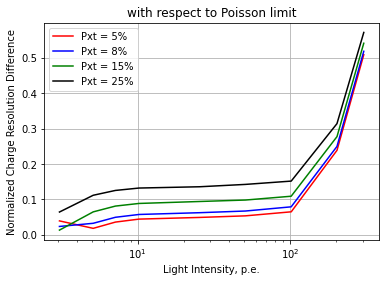

In [30]:
plt.plot(pe_mean[0][1:], diff_05_poisson[1:], color = 'red', label='Pxt = 5%')
plt.plot(pe_mean[1][1:], diff_08_poisson[1:], color = 'blue', label='Pxt = 8%')
plt.plot(pe_mean[2][1:], diff_15_poisson[1:], color = 'green', label='Pxt = 15%')
plt.plot(pe_mean[3][1:], diff_25_poisson[1:], color = 'black', label='Pxt = 25%')

#plt.yscale('log')
plt.title('with respect to Poisson limit')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized Charge Resolution Difference')
plt.grid(True)
plt.legend()
plt.savefig('norm_diff_poisson.png', dpi=1800)
plt.show()

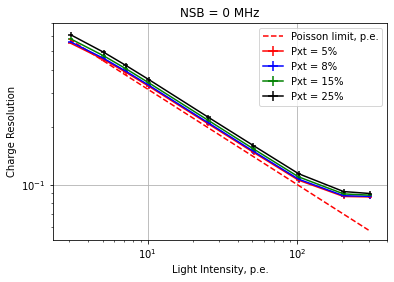

In [32]:
plt.errorbar(pe_mean[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%')
plt.errorbar(pe_mean[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%')
plt.errorbar(pe_mean[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%')
plt.errorbar(pe_mean[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%')

plt.title('NSB = 0 MHz')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.legend()
plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

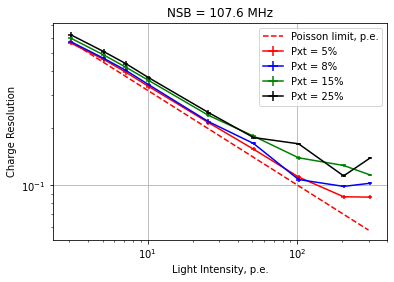

In [95]:
plt.errorbar(pe_mean_nsb[0][1:], charge_resolution_nsb[0][1:], yerr = charge_resolution_std_nsb[0][1:], xerr = pe_std_nsb[0][1:], color = 'red', label='Pxt = 5%')
plt.errorbar(pe_mean_nsb[1][1:], charge_resolution_nsb[1][1:], yerr = charge_resolution_std_nsb[1][1:], xerr = pe_std_nsb[1][1:], color = 'blue', label='Pxt = 8%')
plt.errorbar(pe_mean_nsb[2][1:], charge_resolution_nsb[2][1:], yerr = charge_resolution_std_nsb[2][1:], xerr = pe_std_nsb[2][1:], color = 'green', label='Pxt = 15%')
plt.errorbar(pe_mean_nsb[3][1:], charge_resolution_nsb[3][1:], yerr = charge_resolution_std_nsb[3][1:], xerr = pe_std_nsb[3][1:], color = 'black', label='Pxt = 25%')

plt.title('NSB = 107.6 MHz')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.legend()
#plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

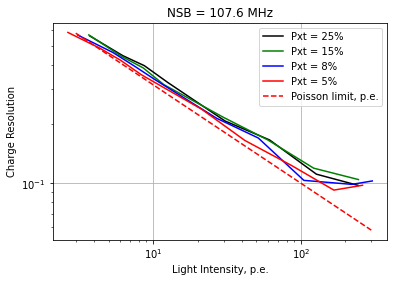

In [93]:
plt.plot(pe_nsb_pde_pixel[3][1:], charge_resolution_nsb_pde_pixel[3][1:], color = 'black', label='Pxt = 25%')
plt.plot(pe_nsb_pde_pixel[2][1:], charge_resolution_nsb_pde_pixel[2][1:], color = 'green', label='Pxt = 15%')
plt.plot(pe_nsb_pde_pixel[1][1:], charge_resolution_nsb_pde_pixel[1][1:], color = 'blue', label='Pxt = 8%')
plt.plot(pe_nsb_pde_pixel[0][1:], charge_resolution_nsb_pde_pixel[0][1:], color = 'red', label='Pxt = 5%')
plt.title('NSB = 107.6 MHz')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.legend()
plt.grid(True)
plt.show()

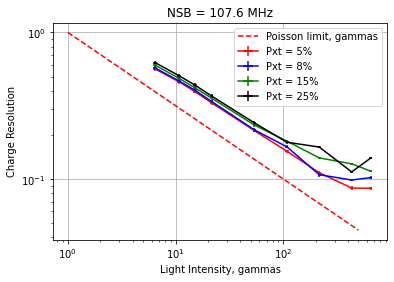

In [100]:
plt.errorbar(gammas_mean_nsb[0][1:], charge_resolution_nsb[0][1:], yerr = charge_resolution_std_nsb[0][1:], xerr = gammas_mean_std_nsb[0][1:], color = 'red', label='Pxt = 5%')
plt.errorbar(gammas_mean_nsb[1][1:], charge_resolution_nsb[1][1:], yerr = charge_resolution_std_nsb[1][1:], xerr = gammas_mean_std_nsb[1][1:], color = 'blue', label='Pxt = 8%')
plt.errorbar(gammas_mean_nsb[2][1:], charge_resolution_nsb[2][1:], yerr = charge_resolution_std_nsb[2][1:], xerr = gammas_mean_std_nsb[2][1:], color = 'green', label='Pxt = 15%')
plt.errorbar(gammas_mean_nsb[3][1:], charge_resolution_nsb[3][1:], yerr = charge_resolution_std_nsb[3][1:], xerr = gammas_mean_std_nsb[3][1:], color = 'black', label='Pxt = 25%')

plt.title('NSB = 107.6 MHz')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
#plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

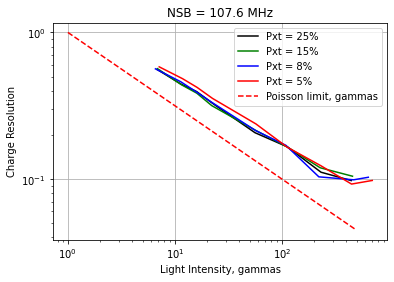

In [110]:
plt.plot(gamma_nsb_pde_pixel[3][1:], charge_resolution_nsb_pde_pixel[3][1:], color = 'black', label='Pxt = 25%')
plt.plot(gamma_nsb_pde_pixel[2][1:], charge_resolution_nsb_pde_pixel[2][1:], color = 'green', label='Pxt = 15%')
plt.plot(gamma_nsb_pde_pixel[1][1:], charge_resolution_nsb_pde_pixel[1][1:], color = 'blue', label='Pxt = 8%')
plt.plot(gamma_nsb_pde_pixel[0][1:], charge_resolution_nsb_pde_pixel[0][1:], color = 'red', label='Pxt = 5%')

plt.title('NSB = 107.6 MHz')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
#plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

In [99]:
charge_resolution_gamma_poisson = []
pe_poisson = np.arange(1, 500, 1)

for i in range(len(pe_poisson)):
    charge_resolution_gamma_poisson.append(1./math.sqrt(pe_poisson[i]))

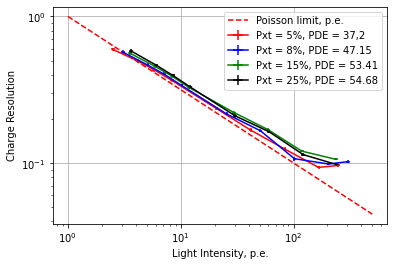

In [125]:
plt.errorbar(pe_mean_nsb_pde[0][1:], charge_resolution_nsb_pde[0][1:], yerr = charge_resolution_std_nsb_pde[0][1:], xerr = pe_std_nsb_pde[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2')
plt.errorbar(pe_mean_nsb_pde[1][1:], charge_resolution_nsb_pde[1][1:], yerr = charge_resolution_std_nsb_pde[1][1:], xerr = pe_std_nsb_pde[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15')
plt.errorbar(pe_mean_nsb_pde[2][1:], charge_resolution_nsb_pde[2][1:], yerr = charge_resolution_std_nsb_pde[2][1:], xerr = pe_std_nsb_pde[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41')
plt.errorbar(pe_mean_nsb_pde[3][1:], charge_resolution_nsb_pde[3][1:], yerr = charge_resolution_std_nsb_pde[3][1:], xerr = pe_std_nsb_pde[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, p.e.')
plt.legend()
#plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

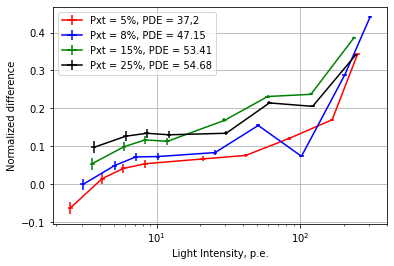

In [126]:
plt.errorbar(pe_mean_nsb_pde[0][1:], (np.array(charge_resolution_nsb_pde[0][1:]) -  1./np.sqrt((pe_mean_nsb_pde[0][1:])) )/np.array(charge_resolution_nsb_pde[0][1:]), yerr = charge_resolution_std_nsb_pde[0][1:], xerr = pe_std_nsb_pde[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2')
plt.errorbar(pe_mean_nsb_pde[1][1:], (np.array(charge_resolution_nsb_pde[1][1:]) -  1./np.sqrt((pe_mean_nsb_pde[1][1:])) )/np.array(charge_resolution_nsb_pde[1][1:]), yerr = charge_resolution_std_nsb_pde[1][1:], xerr = pe_std_nsb_pde[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15')
plt.errorbar(pe_mean_nsb_pde[2][1:], (np.array(charge_resolution_nsb_pde[2][1:]) -  1./np.sqrt((pe_mean_nsb_pde[2][1:])) )/np.array(charge_resolution_nsb_pde[2][1:]), yerr = charge_resolution_std_nsb_pde[2][1:], xerr = pe_std_nsb_pde[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41')
plt.errorbar(pe_mean_nsb_pde[3][1:], (np.array(charge_resolution_nsb_pde[3][1:]) -  1./np.sqrt((pe_mean_nsb_pde[3][1:])) )/np.array(charge_resolution_nsb_pde[3][1:]), yerr = charge_resolution_std_nsb_pde[3][1:], xerr = pe_std_nsb_pde[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Normalized difference')
plt.show()

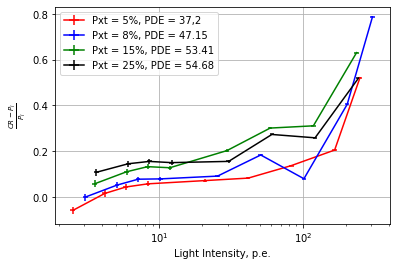

In [62]:
plt.errorbar(pe_mean_nsb_pde[0][1:], (np.array(charge_resolution_nsb_pde[0][1:]) -  1./np.sqrt((pe_mean_nsb_pde[0][1:])) )*np.sqrt((pe_mean_nsb_pde[0][1:])), yerr = charge_resolution_std_nsb_pde[0][1:], xerr = pe_std_nsb_pde[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2')
plt.errorbar(pe_mean_nsb_pde[1][1:], (np.array(charge_resolution_nsb_pde[1][1:]) -  1./np.sqrt((pe_mean_nsb_pde[1][1:])) )*np.sqrt((pe_mean_nsb_pde[1][1:])), yerr = charge_resolution_std_nsb_pde[1][1:], xerr = pe_std_nsb_pde[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15')
plt.errorbar(pe_mean_nsb_pde[2][1:], (np.array(charge_resolution_nsb_pde[2][1:]) -  1./np.sqrt((pe_mean_nsb_pde[2][1:])) )*np.sqrt((pe_mean_nsb_pde[2][1:])), yerr = charge_resolution_std_nsb_pde[2][1:], xerr = pe_std_nsb_pde[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41')
plt.errorbar(pe_mean_nsb_pde[3][1:], (np.array(charge_resolution_nsb_pde[3][1:]) -  1./np.sqrt((pe_mean_nsb_pde[3][1:])) )*np.sqrt((pe_mean_nsb_pde[3][1:])), yerr = charge_resolution_std_nsb_pde[3][1:], xerr = pe_std_nsb_pde[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel(r'$\frac{CR - P_{l}}{P_{l}}$')
plt.show()

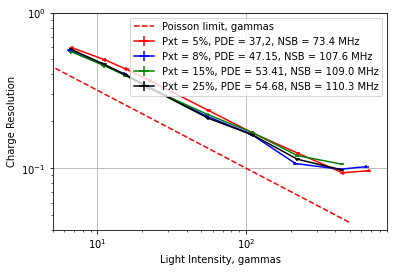

In [127]:
plt.errorbar(gammas_mean_nsb_pde[0][1:], charge_resolution_nsb_pde[0][1:], yerr = charge_resolution_std_nsb_pde[0][1:], xerr = gammas_mean_nsb_pde_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2, NSB = 73.4 MHz')
plt.errorbar(gammas_mean_nsb_pde[1][1:], charge_resolution_nsb_pde[1][1:], yerr = charge_resolution_std_nsb_pde[1][1:], xerr = gammas_mean_nsb_pde_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
plt.errorbar(gammas_mean_nsb_pde[2][1:], charge_resolution_nsb_pde[2][1:], yerr = charge_resolution_std_nsb_pde[2][1:], xerr = gammas_mean_nsb_pde_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(gammas_mean_nsb_pde[3][1:], charge_resolution_nsb_pde[3][1:], yerr = charge_resolution_std_nsb_pde[3][1:], xerr = gammas_mean_nsb_pde_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
plt.ylim(0.04, 1)
plt.xlim(5, 900)
plt.savefig('Charge_resolution_1k_events_gammas.png', dpi=1800)
plt.show()

In [142]:
def read_data_err(filename):
   
    n_pe = []
    q_res = []
    q_res_err = []

    with open(filename, "r") as file:
        lines = file.readlines()[1:]
        for line in lines:
            words = line.split()
            #print(words[0], ' ; ', words[1], ' ; ', words[2])    
            n_pe.append(float(words[0]))
            q_res.append(float(words[1]))
            q_res_err.append(float(words[2]))
                
    return n_pe, q_res, q_res_err

In [143]:
n_pe_25, q_res_25, q_res_25_err = read_data('/home/andrii/work/sim_telarray/charge_resolution/out_file_pxt_0.25_pde_0.54_pixel_6301.txt')
n_pe_15, q_res_15, q_res_15_err = read_data('/home/andrii/work/sim_telarray/charge_resolution/out_file_pxt_0.15_pde_0.53_pixel_6301.txt')
n_gamma_25 = np.array(n_pe_25)/0.54
n_gamma_15 = np.array(n_pe_15)/0.53

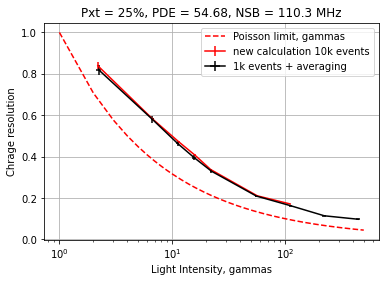

In [163]:
#plt.errorbar(n_gamma_15, q_res_15, yerr = q_res_15_err, color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(n_gamma_25, q_res_25, yerr = q_res_25_err, color = 'red', label='new calculation 10k events')

#plt.errorbar(gammas_mean_nsb_pde[2][1:], charge_resolution_nsb_pde[2][1:], yerr = charge_resolution_std_nsb_pde[2][1:], xerr = gammas_mean_nsb_pde_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(gammas_mean_nsb_pde[3], charge_resolution_nsb_pde[3], yerr = charge_resolution_std_nsb_pde[3], xerr = gammas_mean_nsb_pde_std[3], color = 'black', label='1k events + averaging')

plt.title('Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
plt.savefig('ongoing_charge_resolution_25p_nsb.png', dpi=1800)
plt.show()

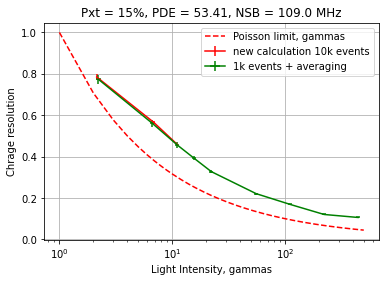

In [162]:
plt.errorbar(n_gamma_15, q_res_15, yerr = q_res_15_err, color = 'red', label='new calculation 10k events')
#plt.errorbar(n_gamma_25, q_res_25, yerr = q_res_25_err,label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.errorbar(gammas_mean_nsb_pde[2], charge_resolution_nsb_pde[2], yerr = charge_resolution_std_nsb_pde[2], xerr = gammas_mean_nsb_pde_std[2], color = 'green', label='1k events + averaging')
#plt.errorbar(gammas_mean_nsb_pde[3][1:], charge_resolution_nsb_pde[3][1:], yerr = charge_resolution_std_nsb_pde[3][1:], xerr = gammas_mean_nsb_pde_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.title('Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
plt.savefig('ongoing_charge_resolution_15p_nsb.png', dpi=1800)
plt.show()

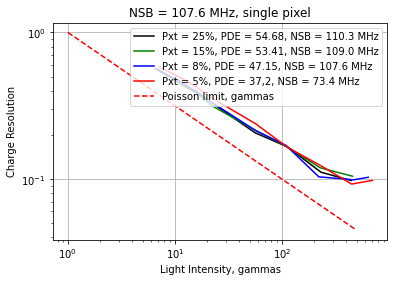

In [131]:
plt.plot(gamma_nsb_pde_pixel[3][1:], charge_resolution_nsb_pde_pixel[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.plot(gamma_nsb_pde_pixel[2][1:], charge_resolution_nsb_pde_pixel[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.plot(gamma_nsb_pde_pixel[1][1:], charge_resolution_nsb_pde_pixel[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
plt.plot(gamma_nsb_pde_pixel[0][1:], charge_resolution_nsb_pde_pixel[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2, NSB = 73.4 MHz')

plt.title('NSB = 107.6 MHz, single pixel')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit, p.e.')
plt.plot(pe_poisson, charge_resolution_gamma_poisson, "--r", label='Poisson limit, gammas')
plt.legend()
#plt.savefig('Charge_resolution_1k_events_pe.png', dpi=1800)
plt.show()

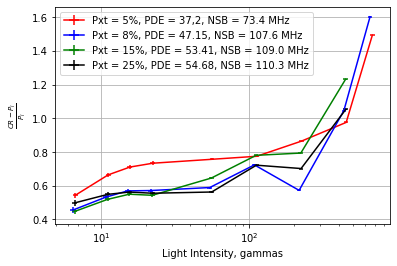

In [128]:
plt.errorbar(gammas_mean_nsb_pde[0][1:], (np.array(charge_resolution_nsb_pde[0][1:]) -  1./np.sqrt((gammas_mean_nsb_pde[0][1:])) )*np.sqrt((gammas_mean_nsb_pde[0][1:])), yerr = charge_resolution_std_nsb_pde[0][1:], xerr = gammas_mean_nsb_pde_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 37,2, NSB = 73.4 MHz')
plt.errorbar(gammas_mean_nsb_pde[1][1:], (np.array(charge_resolution_nsb_pde[1][1:]) -  1./np.sqrt((gammas_mean_nsb_pde[1][1:])) )*np.sqrt((gammas_mean_nsb_pde[1][1:])), yerr = charge_resolution_std_nsb_pde[1][1:], xerr = gammas_mean_nsb_pde_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
plt.errorbar(gammas_mean_nsb_pde[2][1:], (np.array(charge_resolution_nsb_pde[2][1:]) -  1./np.sqrt((gammas_mean_nsb_pde[2][1:])) )*np.sqrt((gammas_mean_nsb_pde[2][1:])), yerr = charge_resolution_std_nsb_pde[2][1:], xerr = gammas_mean_nsb_pde_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(gammas_mean_nsb_pde[3][1:], (np.array(charge_resolution_nsb_pde[3][1:]) -  1./np.sqrt((gammas_mean_nsb_pde[3][1:])) )*np.sqrt((gammas_mean_nsb_pde[3][1:])), yerr = charge_resolution_std_nsb_pde[3][1:], xerr = gammas_mean_nsb_pde_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, gammas')
plt.ylabel(r'$\frac{CR - P_{l}}{P_{l}}$')
plt.savefig('Charge_resolution_diff_1k_events_gammas.png', dpi=1800)
plt.show()

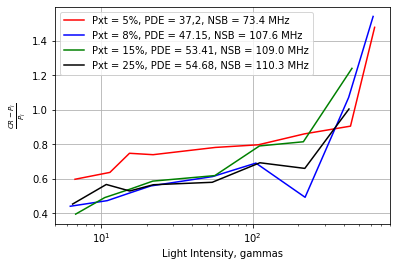

In [139]:
plt.plot(gamma_nsb_pde_pixel[0][1:], (np.array(charge_resolution_nsb_pde_pixel[0][1:]) -  1./np.sqrt((gamma_nsb_pde_pixel[0][1:])) )*np.sqrt((gamma_nsb_pde_pixel[0][1:])), color = 'red', label='Pxt = 5%, PDE = 37,2, NSB = 73.4 MHz')
plt.plot(gamma_nsb_pde_pixel[1][1:], (np.array(charge_resolution_nsb_pde_pixel[1][1:]) -  1./np.sqrt((gamma_nsb_pde_pixel[1][1:])) )*np.sqrt((gamma_nsb_pde_pixel[1][1:])), color = 'blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
plt.plot(gamma_nsb_pde_pixel[2][1:], (np.array(charge_resolution_nsb_pde_pixel[2][1:]) -  1./np.sqrt((gamma_nsb_pde_pixel[2][1:])) )*np.sqrt((gamma_nsb_pde_pixel[2][1:])), color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.plot(gamma_nsb_pde_pixel[3][1:], (np.array(charge_resolution_nsb_pde_pixel[3][1:]) -  1./np.sqrt((gamma_nsb_pde_pixel[3][1:])) )*np.sqrt((gamma_nsb_pde_pixel[3][1:])), color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, gammas')
plt.ylabel(r'$\frac{CR - P_{l}}{P_{l}}$')
plt.savefig('Charge_resolution_diff_1k_events_gammas.png', dpi=1800)
plt.show()

In [151]:
gamma_mean = []
gamma_48_LCT2 = []
gamma_44_LCT2 = []
gamma_35_LCT2 = []
gamma_30_LCT2 = []

gamma_55_FBK = []
gamma_52_FBK = []
gamma_42_FBK = []
gamma_32_FBK = []

gamma_55_LCT5 = []
gamma_54_LCT5 = []
gamma_46_LCT5 = []
gamma_38_LCT5 = []

gamma_59_LVR3 = []
gamma_57_LVR3 = []
gamma_54_LVR3 = []
gamma_52_LVR3 = []

for i in range(len(pe_mean)):
    gamma_mean.append( (np.array(pe_mean[i])/0.35).tolist() )
    gamma_48_LCT2.append( (np.array(pe_mean[i])/0.48).tolist() )
    gamma_44_LCT2.append( (np.array(pe_mean[i])/0.38).tolist() )
    gamma_35_LCT2.append( (np.array(pe_mean[i])/0.35).tolist() )
    gamma_30_LCT2.append( (np.array(pe_mean[i])/0.30).tolist() )
    
    
    gamma_55_FBK.append( (np.array(pe_mean[i])/0.55).tolist() )
    gamma_52_FBK.append( (np.array(pe_mean[i])/0.52).tolist() )
    gamma_42_FBK.append( (np.array(pe_mean[i])/0.42).tolist() )
    gamma_32_FBK.append( (np.array(pe_mean[i])/0.32).tolist() )
    
    gamma_55_LCT5.append( (np.array(pe_mean[i])/0.55).tolist() )
    gamma_54_LCT5.append( (np.array(pe_mean[i])/0.54).tolist() )
    gamma_46_LCT5.append( (np.array(pe_mean[i])/0.46).tolist() )
    gamma_38_LCT5.append( (np.array(pe_mean[i])/0.38).tolist() )
    
    gamma_59_LVR3.append( (np.array(pe_mean[i])/0.59).tolist() )
    gamma_57_LVR3.append( (np.array(pe_mean[i])/0.57).tolist() )
    gamma_54_LVR3.append( (np.array(pe_mean[i])/0.54).tolist() )
    gamma_52_LVR3.append( (np.array(pe_mean[i])/0.52).tolist() )
    

In [112]:
gamma_poisson = gamma_mean[0]
charge_resolution_poisson_gamma = []
charge_resolution_poisson_gamma_50 = []
charge_resolution_poisson_gamma_35 = []
charge_resolution_poisson_gamma_60 = []

for i in range(len(gamma_poisson)):
    charge_resolution_poisson_gamma.append(1./math.sqrt(gamma_poisson[i]))
    charge_resolution_poisson_gamma_50.append(1./math.sqrt(0.5*gamma_poisson[i]))
    charge_resolution_poisson_gamma_35.append(1./math.sqrt(0.35*gamma_poisson[i]))
    charge_resolution_poisson_gamma_60.append(1./math.sqrt(0.6*gamma_poisson[i]))

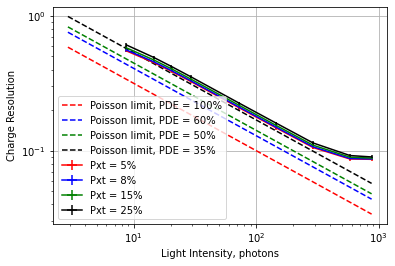

In [146]:
plt.errorbar(gamma_mean[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%')
plt.errorbar(gamma_mean[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%')
plt.errorbar(gamma_mean[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%')
plt.errorbar(gamma_mean[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(gamma_poisson, charge_resolution_poisson_gamma, "--r", label='Poisson limit, PDE = 100%')
plt.plot(gamma_poisson, charge_resolution_poisson_gamma_60, "--b", label='Poisson limit, PDE = 60%')
plt.plot(gamma_poisson, charge_resolution_poisson_gamma_50, "--g", label='Poisson limit, PDE = 50%')
plt.plot(gamma_poisson, charge_resolution_poisson_gamma_35, '--', color = 'black', label='Poisson limit, PDE = 35%')
plt.legend()
plt.savefig('Charge_resolution_gammas.png', dpi=1800)
plt.show()

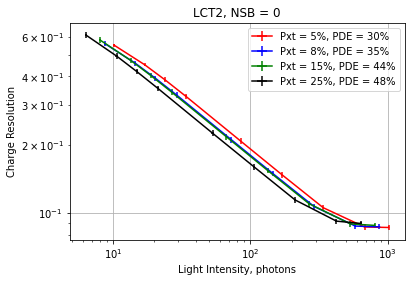

In [149]:
plt.errorbar(gamma_30_LCT2[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 30%')
plt.errorbar(gamma_35_LCT2[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 35%')
plt.errorbar(gamma_44_LCT2[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 44%')
plt.errorbar(gamma_48_LCT2[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 48%')

plt.title('LCT2, NSB = 0')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma, "--r", label='Poisson limit, PDE = 100%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_60, "--b", label='Poisson limit, PDE = 60%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_50, "--g", label='Poisson limit, PDE = 50%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_35, '--', color = 'black', label='Poisson limit, PDE = 35%')
plt.legend()
plt.savefig('Charge_resolution_LCT2.png', dpi=1800)
plt.show()

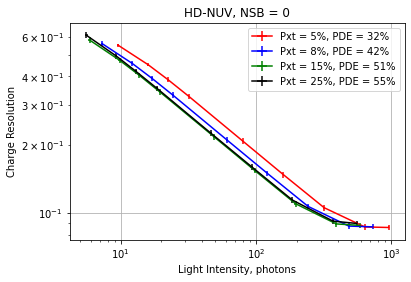

In [147]:
plt.errorbar(gamma_32_FBK[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 32%')
plt.errorbar(gamma_42_FBK[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 42%')
plt.errorbar(gamma_52_FBK[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 51%')
plt.errorbar(gamma_55_FBK[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 55%')

plt.title('HD-NUV, NSB = 0')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma, "--r", label='Poisson limit, PDE = 100%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_60, "--b", label='Poisson limit, PDE = 60%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_50, "--g", label='Poisson limit, PDE = 50%')
#plt.plot(gamma_poisson, charge_resolution_poisson_gamma_35, '--', color = 'black', label='Poisson limit, PDE = 35%')
plt.legend()
plt.savefig('Charge_resolution_FBK.png', dpi=1800)
plt.show()

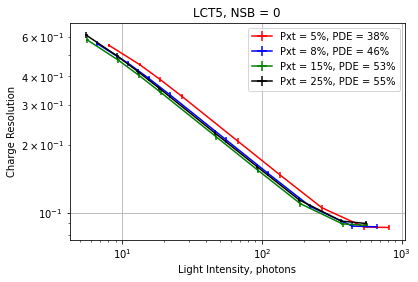

In [148]:
plt.errorbar(gamma_38_LCT5[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 38%')
plt.errorbar(gamma_46_LCT5[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 46%')
plt.errorbar(gamma_54_LCT5[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 53%')
plt.errorbar(gamma_55_LCT5[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 55%')

plt.title('LCT5, NSB = 0')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.savefig('Charge_resolution_LCT5.png', dpi=1800)
plt.show()

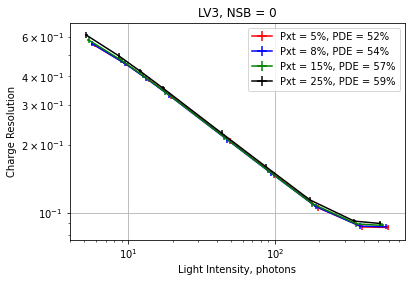

In [154]:
plt.errorbar(gamma_52_LVR3[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%, PDE = 52%')
plt.errorbar(gamma_54_LVR3[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 54%')
plt.errorbar(gamma_57_LVR3[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 57%')
plt.errorbar(gamma_59_LVR3[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 59%')

plt.title('LV3, NSB = 0')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.savefig('Charge_resolution_LVR3.png', dpi=1800)
plt.show()

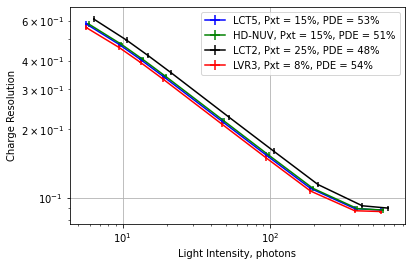

In [157]:
plt.errorbar(gamma_54_LCT5[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'blue', label='LCT5, Pxt = 15%, PDE = 53%')
plt.errorbar(gamma_52_FBK[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='HD-NUV, Pxt = 15%, PDE = 51%')
plt.errorbar(gamma_48_LCT2[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='LCT2, Pxt = 25%, PDE = 48%')
plt.errorbar(gamma_54_LVR3[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'red', label='LVR3, Pxt = 8%, PDE = 54%')


plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
#plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.savefig('Charge_resolution_devices.png', dpi=800)
plt.show()

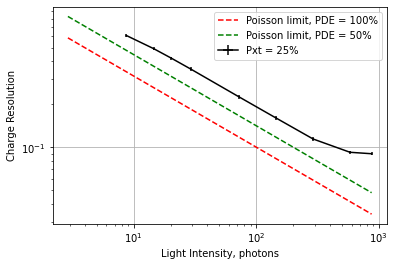

In [121]:
plt.errorbar(gamma_mean[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, photons')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(gamma_poisson, charge_resolution_poisson_gamma, "--r", label='Poisson limit, PDE = 100%')
plt.plot(gamma_poisson, charge_resolution_poisson_gamma_50, "--g", label='Poisson limit, PDE = 50%')
plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.show()

[2.9113304119193693,
 8.737347260727253,
 14.55642955517001,
 20.377958110500995,
 29.116032123629473,
 72.79446493408933,
 145.57280223219877,
 291.35260369529055,
 582.3831465417018,
 873.4364481568263]

In [77]:
(np.array(pe_mean[0])/0.35).tolist()

[2.9113304119193693,
 8.737347260727253,
 14.55642955517001,
 20.377958110500995,
 29.116032123629473,
 72.79446493408933,
 145.57280223219877,
 291.35260369529055,
 582.3831465417018,
 873.4364481568263]

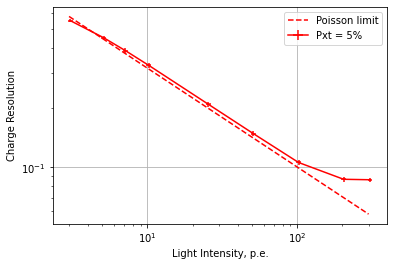

In [67]:
plt.errorbar(pe_mean[0][1:], charge_resolution[0][1:], yerr = charge_resolution_std[0][1:], xerr = pe_std[0][1:], color = 'red', label='Pxt = 5%')
#plt.errorbar(pe_mean[1][1:], charge_resolution[1][1:], yerr = charge_resolution_std[1][1:], xerr = pe_std[1][1:], color = 'blue', label='Pxt = 8%')
#plt.errorbar(pe_mean[2][1:], charge_resolution[2][1:], yerr = charge_resolution_std[2][1:], xerr = pe_std[2][1:], color = 'green', label='Pxt = 15%')
#plt.errorbar(pe_mean[3][1:], charge_resolution[3][1:], yerr = charge_resolution_std[3][1:], xerr = pe_std[3][1:], color = 'black', label='Pxt = 25%')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit')
plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.show()

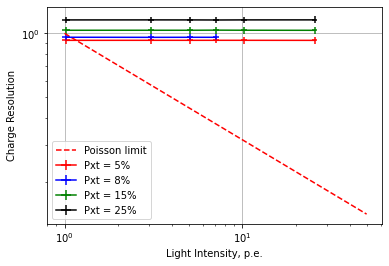

In [117]:
plt.errorbar(pe_mean_nsb[0], charge_resolution_nsb[0], yerr = charge_resolution_std_nsb[0], xerr = pe_std_nsb[0], color = 'red', label='Pxt = 5%')
plt.errorbar(pe_mean_nsb[1], charge_resolution_nsb[1], yerr = charge_resolution_std_nsb[1], xerr = pe_std_nsb[1], color = 'blue', label='Pxt = 8%')
plt.errorbar(pe_mean_nsb[2], charge_resolution_nsb[2], yerr = charge_resolution_std_nsb[2], xerr = pe_std_nsb[2], color = 'green', label='Pxt = 15%')
plt.errorbar(pe_mean_nsb[3], charge_resolution_nsb[3], yerr = charge_resolution_std_nsb[3], xerr = pe_std_nsb[3], color = 'black', label='Pxt = 25%')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(pe_poisson, charge_resolution_poisson, "--r", label='Poisson limit')
plt.savefig('Charge_resolution_200_events.png', dpi=1800)
plt.legend()
plt.show()

In [30]:
charge_array_px_5 = np.array(charge_resolution[0]).flatten('C')
pe_mean_array_pxt_5 = np.array(pe_mean[0]).flatten('C')

In [31]:
charge_array_px_8 = np.array(charge_resolution[1]).flatten('C')
pe_mean_array_pxt_8 = np.array(pe_mean[1]).flatten('C')

In [32]:
charge_array_px_15 = np.array(charge_resolution[2]).flatten('C')
pe_mean_array_pxt_15 = np.array(pe_mean[2]).flatten('C')

In [33]:
charge_array_px_25 = np.array(charge_resolution[3]).flatten('C')
pe_mean_array_pxt_25 = np.array(pe_mean[3]).flatten('C')

In [34]:
charge_array = np.array(charge_resolution).flatten('C')
pe_mean_array = np.array(pe_mean).flatten('C')

In [35]:
charge_array

array([0.69380131, 0.54977799, 0.45106182, 0.38777132, 0.32697827,
       0.20779754, 0.14756341, 0.10547961, 0.08674233, 0.08627698,
       0.71005312, 0.55876229, 0.45738054, 0.39285725, 0.33108677,
       0.21044706, 0.1494753 , 0.10687426, 0.08751637, 0.08682962,
       0.75011514, 0.57942933, 0.47170467, 0.40471169, 0.34083647,
       0.21672435, 0.15382205, 0.10984285, 0.08945657, 0.08813105,
       0.81138795, 0.6086712 , 0.49247979, 0.42125581, 0.35447202,
       0.2249738 , 0.16001316, 0.11407992, 0.09202488, 0.0898773 ])

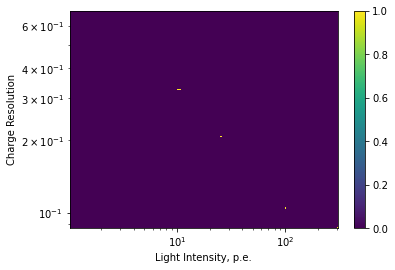

In [39]:
#plt.hist2d(pe_mean[0] + pe_mean[1] + pe_mean[2], charge_resolution[0] + charge_resolution[1] + charge_resolution[2], bins=400)
plt.hist2d(pe_mean_array_pxt_5, charge_array_px_5, bins=400)
#plt.hist2d(pe_mean_array_pxt_8, charge_array_px_8, bins=400)
#plt.hist2d(pe_mean_array_pxt_15, charge_array_px_15, bins=400)
#plt.hist2d(pe_mean_array_pxt_25, charge_array_px_25, bins=400)

#plt.hist2d(pe_true_map_mean[0], charge_resolution[0], bins=30, cmap='Blues', range=[[0.1, 150], [0.1, 1]])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, p.e.')
plt.ylabel('Charge Resolution')
plt.colorbar()
#plt.plot(pe_poisson, charge_resolution_poisson, "-r", label='Poisson limit')
#plt.savefig('charge_resolution_6intensity.png', dpi=800)
plt.show()

In [34]:
n_pe

[5.3319,
 5.3334,
 5.3149,
 5.3108,
 5.4555,
 5.2798,
 5.197,
 5.332,
 5.3717,
 5.2339,
 5.2912,
 5.2687,
 5.272,
 5.2742,
 5.2822,
 5.2313,
 5.4914,
 5.2438,
 5.0374,
 5.2235,
 5.3597,
 5.3731,
 5.4598,
 5.3173,
 5.2744,
 5.1544,
 5.1128,
 5.3844,
 5.3223,
 5.2682,
 5.2842,
 5.2674,
 5.1355,
 5.3258,
 5.1243,
 5.33,
 5.4271,
 5.2786,
 5.2695,
 5.3167,
 5.2133,
 5.2876,
 5.4143,
 5.3145,
 5.3891,
 5.2533,
 5.3228,
 5.2473,
 5.3407,
 5.43,
 5.2938,
 5.2716,
 5.281,
 5.2878,
 5.1213,
 5.3314,
 5.2732,
 5.3352,
 5.3121,
 5.478,
 5.385,
 5.2278,
 5.2548,
 5.3642,
 5.3063,
 5.3359,
 5.2378,
 5.3698,
 5.3497,
 5.1815,
 5.1319,
 5.3576,
 5.4088,
 5.1953,
 5.2616,
 5.1112,
 5.237,
 5.2422,
 5.3565,
 5.3184,
 5.3399,
 5.3438,
 5.2324,
 5.3147,
 5.3788,
 5.184,
 5.2718,
 5.2916,
 5.3622,
 5.2946,
 5.3054,
 5.1843,
 5.313,
 5.2109,
 5.5177,
 5.2658,
 5.1824,
 5.2931,
 5.2974,
 5.1079,
 5.426,
 5.3961,
 5.2157,
 5.2077,
 5.2881,
 5.1395,
 5.2224,
 4.9992,
 5.2804,
 5.3443,
 5.0478,
 5.42,
 5.2022,